# Design your ML project


## 1. **Frame the project**

* Motivate the need for Machine Learning in your scientific project. 

Perform litterature review of the scientific outstanding questions and solutions proposed in the literature. What would be the steps to solve the problem manually? What are the limitations of the current solutions? Will a new ML algorithm be generalizable enough to be applied to 10+ other research problems? What is the 5-10 year potential of the particular problem given new technology, new research facility, new societal relevance? Are there comparable problems for which the tools can be reused?

* What is the state of the data?

Is there a lot of data, and labeled data? Is there human expertise available? Will this be a supervised or unsupervised learning problem? Can the data be accessed from open-access archives that meet FAIR guidelines? what would be its DOI?


## 2. **Organize the project**

Start a github, a readme, create an environment with a YML file, human and machine readible files and folder.  Make sure the project name has not been used before.

## 3. **Download the data**

List the data, data information, data labels, data provenance (including accessibility from open access data archives)? How large is the data? What data format would be optimal to be read across languages (python, C, R, matlab, julia etc), can it store metadata, how does it perform with I/O?

Is the data geospatial, or time series?

Find appropriate compute platform to storage and I/O of the data (cloud computing, institutional linux cluster etc).

Create a jupyter notebook to document data download and storage.

## 4. **Data preparation**


* **Explore the data**

create a jupyter notebook to preliminary data exploration. Document:
- The name, the data type
- The noise: what is the type of noise (stochastic, outliers etc, data gaps)
- Data distribution: gaussian, uniform, logarithmic etc.
- Data labels (or target attributes)


Visualize a subset of the data.

Study basic data correlations between attributes.

How would you solve the problem manually given this data.

Identify transformation that may be useful (such as STFT, CWT, PCA etc...)

Save preliminary plots and notebooks. Document finding.

* **First data manipulation**

Copy the data and work on these copies.

Write functions for all data transformation so that they can be automatically called (and easily debugged). These functions will be used for training, validating, and test sets.

**Clean data**: fix or remove outliers, fill missing values (zero, mean median) or drop data (when too many data gaps for instance).
Save the clean copy of the data in a different file.

Avoid using toy, simple synthetic data. Try and use dataset that are collected from the real-world. The behavior of the algorithm may be completely different.

* **Feature preparation**

**Drop** attributes that are not useful for the task.

**Transform** features (such as STFT, ...)

Explore quick and promising features (e.g. PGA for ground motions)

**Scale** the feature to standardize or normalize. ML algorithms will not perform well in most cases without normalization of the input feature or data. Scaling is not a requirement but it tends to improve the training behavior.
+ *Min-max scaling*: removes the minimal value, then normalize by the maximum value of the distribution so that the amplitudes range between 0 and 1. It is appropriate when the features are positive numbers. The scikit-learn built in function ``sklearn.preprocessing.MinMaxScaler()`` performs:

<code>X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))</code>

<code>X_scaled = X_std * (max - min) + min</code>
Scikit learn has built in functions to do the scaling.

In [1]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import matplotlib.pyplot as plt
data = [[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
scaler = MinMaxScaler()
scaler.fit(data)# fit the model for data normalization
newdata = scaler.transform(data) # transform the data. watch that data was converted to a numpy array
print(type(data))
print(data)
print(type(newdata))
print(newdata)
print(newdata)

<class 'list'>
[[-1, 2], [-0.5, 6], [0, 10], [1, 18]]
<class 'numpy.ndarray'>
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]
[[0.   0.  ]
 [0.25 0.25]
 [0.5  0.5 ]
 [1.   1.  ]]


(array([ 3.,  1.,  6., 18., 18., 15., 15., 13.,  6.,  5.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

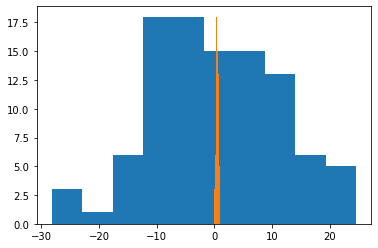

In [2]:
# another more direct way is to usee the fit_transform (instead of 2 successive functions)
crap=10*np.random.randn(100)
newdata = scaler.fit_transform(crap.reshape(-1, 1))
plt.hist(crap)
plt.hist(newdata)

+ *Standardization*: removes the mean and divide by the standard deviation. Output distribution does not have bounds. More stable that minmax because it is less sensitive to outliers. The scikit-learn built-in function is ````sklearn.preprocessing.StandardScaler()````

There are other ways to normalize the input feature/data.
https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing




## 5.  **Dimensionality reduction**

Explore possible ways to reduce the dimension of the data. PCA, ICA, ...

Document the data transformation with notebooks. Reassign data attributes/labels in the new coordinates.

## 6. **Model design**

Find the ***baseline*** model that the ML project is supposed to beat. At the lease, your ML algorithm has to beat the *random* baseline or there are issues in the model design or in the input data.

Try several model algorithms. *No free lunch theorem* (Worlpert 1995), there is not such thing as the best learning algorithm. Instead, there is a data set where it is very accurate.

Separate the data in 3 sets:

- The training set (< 66% of data): data set used for training the algorithm
- The validation set (< 33% of data): data set used to tune the model hyperparameters or help design the model structure.
The pair of training and validation sets can be generated using cross-validation for training. Training the same algorithm multiple times with different training-validation sets and with different initial conditions allows to calculate the *expected error* of the learning algorithm, an average of all model estimate errors.
- The test set (~=33%): data set to test model performance of the algorithm.

The model should have the **minimum complexity** that is required to **minimize the model expected error**.

## 7. **Model Training**

Save intermediate results when possible.
Save seeds of the random number generator to be able to reproduce the results.

Avoid writing your own homewgrown library of codes. Use reliable sources.

Provide good documentation, especially when working in groups.

Start smaller than the final run. It is suggested that no more than 25% of the available resources should be used in the first model design.

Select a performance measure. For *regression*, performance measures are based on residuals between the prediction and the data values. For *classification*, we will see below that it's a bit more elaborate.


We will explore in later chapters strategies for training.

